# 1. 3rd Anomaly - Severe Slugging
## 일정한 유량의 oil이 들어오는 것이 아니라 공기가 섞인 상태로 oil이 같이 들어와 센서의 압력과 온도가 매우 요동친다. 이때 공기와 Oil의 비율에 따라서 다른 패턴(상이한 압력과 온도)을 보인다. Slugging이 발생할 때 데이터상에 특정 패턴이 반복된다는 공통점이 있다. 모든 값이 이상 데이터이고, 유일하게 패턴을 보이는 이상 징후이기 때문에 이를 초점을 둘 필요성이 있다.

In [ ]:
# 라이브러리import
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.style.use(['dark_background'])
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# 데이터셋 전처리

## Train Set

In [ ]:
# 이상 클래스 3번 데이터셋의 주소
linklist=['WELL-00001_20170320130025.csv',
'WELL-00014_20170917150000.csv',
'WELL-00014_20170917200000.csv',
'WELL-00014_20170918020114.csv',
'WELL-00014_20170918070135.csv',
'WELL-00014_20170918120103.csv',
'WELL-00014_20170919210016.csv',
'WELL-00014_20170920010042.csv',
'WELL-00014_20170920060228.csv',
'WELL-00014_20170920110053.csv',
'WELL-00014_20170920190207.csv',
'WELL-00014_20170921000053.csv',
'WELL-00014_20170921050404.csv',
'WELL-00014_20170921100155.csv',
'WELL-00014_20170921150042.csv',
'WELL-00014_20170921200114.csv',
'WELL-00014_20170922010042.csv',
'WELL-00014_20170922060124.csv',
'WELL-00014_20170922110042.csv',
'WELL-00014_20170922160249.csv',
'WELL-00014_20170925010031.csv',
'WELL-00014_20170925060042.csv',
'WELL-00014_20170925110124.csv',
'WELL-00014_20170925160218.csv',
'WELL-00014_20170925210042.csv',
'WELL-00014_20170926020340.csv',
'WELL-00014_20170926070042.csv',
'WELL-00014_20170926120103.csv',
'WELL-00014_20170926170228.csv',
'WELL-00014_20171028080000.csv',
'WELL-00014_20171028130000.csv',
'WELL-00014_20171028180038.csv']

In [ ]:
#데이터셋 모두 데이터프레임으로 변환 후 리스트에 담기
dflist=[]
for i in linklist:
  d = pd.read_csv('https://raw.githubusercontent.com/petrobras/3W/main/dataset/3/'+i)
  dflist.append(d)

dflist

[                        timestamp  P-PDG       P-TPT     T-TPT  P-MON-CKP  \
 0      2017-03-20 13:00:25.000000    0.0  14071870.0  117.1827  6085929.0   
 1      2017-03-20 13:00:26.000000    0.0  14072180.0  117.1828  6087002.0   
 2      2017-03-20 13:00:27.000000    0.0  14072490.0  117.1829  6088075.0   
 3      2017-03-20 13:00:28.000000    0.0  14072800.0  117.1830  6089148.0   
 4      2017-03-20 13:00:29.000000    0.0  14073110.0  117.1831  6090221.0   
 ...                           ...    ...         ...       ...        ...   
 17971  2017-03-20 17:59:56.000000    0.0  14055950.0  116.8203  6025813.0   
 17972  2017-03-20 17:59:57.000000    0.0  14055620.0  116.8200  6025539.0   
 17973  2017-03-20 17:59:58.000000    0.0  14055290.0  116.8197  6025265.0   
 17974  2017-03-20 17:59:59.000000    0.0  14054970.0  116.8194  6024990.0   
 17975  2017-03-20 18:00:00.000000    0.0  14054640.0  116.8192  6024716.0   
 
        T-JUS-CKP  P-JUS-CKGL  T-JUS-CKGL  QGL  class  
 0    

In [ ]:
len(dflist)   #데이터셋 32개

32

In [ ]:
for i in dflist:
  print(len(i))

 #32개 중 test를 위한 데이터셋 6개 랜덤으로 선택#가장 짧은 게 14385이다. 길이를 일정하게 맞추기 위해 각 데이터셋을 timestamp 10000개씩 묶어 자른 후 이어 붙일 것임.

17976
17776
17962
17927
17906
17938
14385
17959
17853
17948
17874
17948
17757
17738
17959
17927
17959
17917
17959
17832
17970
17959
17917
17863
17959
17595
17959
17755
17853
17975
17962
17885


In [ ]:
#32개 중 test를 위한 데이터셋 6개 랜덤으로 선택
for i in range(6):
  print(random.randrange(32))

21
23
18
30
6
21


In [ ]:
indexlist = [4,5,12,16,20,25]
testlist = []

for i in indexlist:
  d = dflist.pop(i)
  testlist.append(d)

print(len(dflist), len(testlist))

26 6


In [ ]:
def dflist_to_df(dflist):
  #데이터프레임 처리: column은 필요한 4개만 남기고, 데이터셋 하나당 10000개씩 3번 묶어서 자른다.
  for i in range(len(dflist)):
    df=dflist[i].iloc[:, 2:6].dropna()
    ld=len(df)
    ld2=round((10000+ld)/2)

    n1 = pd.DataFrame(np.array(df.iloc[:10000]).flatten()).T
    n2 = pd.DataFrame(np.array(df.iloc[ld2-10000:ld2]).flatten()).T
    n3 = pd.DataFrame(np.array(df.iloc[ld-10000:ld]).flatten()).T

    df_add = pd.concat([n1,n2,n3]).reset_index(drop=True)
    if i<1:
      df_new = df_add
    else:
      df_new = pd.concat([df_new, df_add]).reset_index(drop=True)

  return df_new

In [ ]:
df_train = dflist_to_df(dflist)
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,14071870.0,117.18270,6085929.0,69.02943,14072180.0,117.18280,6087002.0,69.03323,14072490.0,117.18290,6088075.0,69.03702,14072800.0,117.18300,6089148.0,69.04082,14073110.0,117.18310,6090221.0,69.04462,14073420.0,117.18320,6091294.0,69.04842,14073730.0,117.18330,6092367.0,69.05221,14074040.0,117.18340,6093440.0,69.05601,14074350.0,117.18360,6094513.0,69.05981,14074660.0,117.18370,6095586.0,69.06361,14074970.0,117.18380,6096659.0,69.06741,14075270.0,117.18390,6097732.0,69.07120,14075580.0,117.18400,...,6171459.0,69.29482,14327090.0,117.50440,6170972.0,69.30030,14328080.0,117.50550,6170486.0,69.30578,14329070.0,117.50660,6170000.0,69.31126,14330060.0,117.50770,6169514.0,69.31673,14331050.0,117.50870,6169028.0,69.32222,14332040.0,117.50980,6168542.0,69.32770,14333030.0,117.51090,6168055.0,69.33318,14334020.0,117.51200,6167569.0,69.33865,14335010.0,117.51310,6167083.0,69.34413,14335990.0,117.51420,6166597.0,69.34961,14336980.0,117.51530,6166111.0,69.35509,14337970.0,117.51630,6165624.0,69.36057
1,14269350.0,117.04660,6046300.0,69.29147,14269020.0,117.04560,6051592.0,69.27628,14268690.0,117.04470,6056884.0,69.26109,14268350.0,117.04380,6062176.0,69.24590,14268020.0,117.04290,6067467.0,69.23071,14267690.0,117.04200,6072760.0,69.21552,14267360.0,117.04110,6078051.0,69.20033,14267030.0,117.04020,6083344.0,69.18513,14266700.0,117.03930,6088635.0,69.16994,14266370.0,117.03840,6093927.0,69.15475,14266040.0,117.03740,6099219.0,69.13956,14265710.0,117.03650,6104511.0,69.12437,14265380.0,117.03560,...,6143678.0,69.38261,14332200.0,117.37190,6144341.0,69.38418,14332370.0,117.37120,6145004.0,69.38575,14332530.0,117.37060,6145667.0,69.38732,14332700.0,117.36990,6146330.0,69.38889,14332860.0,117.36930,6146993.0,69.39046,14333030.0,117.36860,6147656.0,69.39204,14333190.0,117.36800,6148319.0,69.39361,14333360.0,117.36740,6148982.0,69.39518,14333520.0,117.36670,6149645.0,69.39675,14333690.0,117.36610,6150308.0,69.39832,14333850.0,117.36540,6150971.0,69.39989,14334020.0,117.36480,6151635.0,69.40147
2,14256370.0,117.05280,5854225.0,69.98448,14256240.0,117.05150,5855021.0,69.98587,14256120.0,117.05020,5855816.0,69.98725,14255990.0,117.04890,5856612.0,69.98864,14255870.0,117.04760,5857408.0,69.99002,14255740.0,117.04630,5858204.0,69.99141,14255620.0,117.04500,5858999.0,69.99279,14255490.0,117.04370,5859795.0,69.99418,14255370.0,117.04240,5860590.0,69.99556,14255240.0,117.04110,5861386.0,69.99695,14255120.0,117.03980,5862182.0,69.99833,14254990.0,117.03850,5862978.0,69.99972,14254870.0,117.03720,...,6028008.0,70.39169,14058240.0,116.82220,6027734.0,70.39278,14057910.0,116.82190,6027460.0,70.38929,14057580.0,116.82160,6027185.0,70.38580,14057260.0,116.82130,6026911.0,70.38232,14056930.0,116.82110,6026637.0,70.37883,14056600.0,116.82080,6026362.0,70.37534,14056270.0,116.82050,6026088.0,70.37186,14055950.0,116.82030,6025813.0,70.36837,14055620.0,116.82000,6025539.0,70.36488,14055290.0,116.81970,6025265.0,70.36140,14054970.0,116.81940,6024990.0,70.35791,14054640.0,116.81920,6024716.0,70.35443
3,13445530.0,57.04935,2210575.0,37.78826,13445580.0,57.04918,2211325.0,37.78814,13445620.0,57.04901,2212075.0,37.78801,13445670.0,57.04884,2212825.0,37.78788,13445310.0,57.04804,2213575.0,37.78776,13444940.0,57.04724,2214325.0,37.78763,13444600.0,57.04678,2215075.0,37.78751,13444250.0,57.04631,2215825.0,37.78738,13444890.0,57.04623,2216734.0,37.78725,13445520.0,57.04615,2217643.0,37.78713,13444910.0,57.04587,2218552.0,37.78700,13444300.0,57.04558,2219461.0,37.78688,13444600.0,57.04523,...,2305446.0,37.75167,13514810.0,56.81948,2307

In [ ]:
df_train.isnull().sum().sum()   # nan값 없음

0

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)   # row shuffle

## Test Set

In [ ]:
df_test1 = dflist_to_df(testlist)
df_test1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,14999240.0,50.79725,1786886.0,24.92106,15000070.0,50.78597,1786128.0,24.92385,15000900.0,50.77469,1785371.0,24.92665,15001720.0,50.76347,1784613.0,24.92944,15002530.0,50.75224,1783856.0,24.93224,15002700.0,50.74958,1783098.0,24.93503,15002860.0,50.74692,1782340.0,24.93783,15003030.0,50.74426,1781583.0,24.94062,15003200.0,50.74160,1780825.0,24.94342,15005070.0,50.71657,1779765.0,24.94621,15006930.0,50.69153,1778704.0,24.94901,15007850.0,50.68218,1777644.0,24.95180,15008760.0,50.67283,...,2012037.0,26.49439,16254180.0,41.74240,2015977.0,26.49542,16252560.0,41.73784,2019916.0,26.49646,16251550.0,41.73477,2023855.0,26.49749,16250550.0,41.73170,2027795.0,26.49853,16249370.0,41.72853,2031734.0,26.49957,16248190.0,41.72537,2035674.0,26.50060,16246380.0,41.72208,2039613.0,26.50164,16244570.0,41.71879,2043552.0,26.50267,16242900.0,41.71545,2047492.0,26.50371,16241240.0,41.71210,2049992.0,26.50475,16240080.0,41.70862,2052492.0,26.50578,16238920.0,41.70514,2054992.0,26.50682
1,16397670.0,38.96991,1845901.0,27.12145,16396930.0,38.98439,1849007.0,27.12138,16396490.0,38.99940,1852113.0,27.12131,16396050.0,39.01440,1855219.0,27.12123,16395820.0,39.01817,1858325.0,27.12116,16395590.0,39.02195,1862037.0,27.12109,16395360.0,39.02572,1865750.0,27.12102,16395120.0,39.02950,1869462.0,27.12094,16391780.0,39.07088,1873174.0,27.12087,16388440.0,39.11226,1876886.0,27.12080,16387860.0,39.12197,1880598.0,27.12073,16387270.0,39.13169,1884310.0,27.12065,16386690.0,39.14140,...,1194538.0,26.13925,16204250.0,43.69758,1194462.0,26.13927,16204900.0,43.69592,1194387.0,26.13928,16205550.0,43.69425,1194311.0,26.13930,16205990.0,43.69239,1194235.0,26.13932,16206430.0,43.69053,1194159.0,26.13934,16207070.0,43.68857,1194841.0,26.13936,16207700.0,43.68660,1195523.0,26.13938,16208520.0,43.68513,1196205.0,26.13940,16209330.0,43.68367,1196887.0,26.13942,16210140.0,43.68221,1197568.0,26.13944,16210950.0,43.68075,1198250.0,26.13946,16211650.0,43.67879,1198932.0,26.13948
2,16012310.0,45.22383,1388326.0,25.79035,16012750.0,45.22800,1388174.0,25.79148,16013860.0,45.23449,1388023.0,25.79261,16014970.0,45.24099,1387871.0,25.79374,16016090.0,45.24302,1387720.0,25.79486,16017220.0,45.24505,1387568.0,25.79599,16018350.0,45.24708,1387417.0,25.79712,16019470.0,45.24911,1387265.0,25.79824,16019720.0,45.24969,1387114.0,25.79937,16019970.0,45.25027,1386962.0,25.80050,16020220.0,45.25085,1386811.0,25.80163,16020470.0,45.25143,1386659.0,25.80275,16021420.0,45.25249,...,1385220.0,25.23030,14776220.0,55.29291,1385826.0,25.23272,14778010.0,55.28592,1385674.0,25.23514,14779030.0,55.28130,1385523.0,25.23755,14780050.0,55.27668,1385371.0,25.23997,14780850.0,55.27197,1385220.0,25.24239,14781650.0,55.26726,1385068.0,25.24481,14782510.0,55.26263,1384917.0,25.24723,14783370.0,55.25800,1384765.0,25.24965,14784290.0,55.25346,1384614.0,25.25207,14785210.0,55.24893,1384462.0,25.25448,14787830.0,55.24023,1384311.0,25.25690,14790440.0,55.23152,1384159.0,25.25932
3,16893360.0,44.72708,1322720.0,22.23953,16893170.0,44.72649,1323629.0,22.24283,16893650.0,44.72628,1324538.0,22.24612,16894130.0,44.72608,1325447.0,22.24942,16894270.0,44.72656,1326356.0,22.25272,16894420.0,44.72705,1327265.0,22.25601,16893540.0,44.72766,1328174.0,22.25931,16892670.0,44.72826,1329083.0,22.26261,16892980.0,44.72990,1329992.0,22.26591,16893290.0,44.73154,1329386.0,22.26920,16894490.0,44.73212,1328780.0,22.27250,16895690.0,44.73270,1328174.0,22.27580,16895630.0,44.73313,...,1260826.0,24.89854,16268430.0,45.17917,1259993.0,24.89832,16269090.0,45.17743,1259159.0,24.89809,16269790.0,45.17656,1

In [ ]:
df_test1[40000] = 1   # y값 (class) 생성
df_test1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,14999240.0,50.79725,1786886.0,24.92106,15000070.0,50.78597,1786128.0,24.92385,15000900.0,50.77469,1785371.0,24.92665,15001720.0,50.76347,1784613.0,24.92944,15002530.0,50.75224,1783856.0,24.93224,15002700.0,50.74958,1783098.0,24.93503,15002860.0,50.74692,1782340.0,24.93783,15003030.0,50.74426,1781583.0,24.94062,15003200.0,50.74160,1780825.0,24.94342,15005070.0,50.71657,1779765.0,24.94621,15006930.0,50.69153,1778704.0,24.94901,15007850.0,50.68218,1777644.0,24.95180,15008760.0,50.67283,...,26.49439,16254180.0,41.74240,2015977.0,26.49542,16252560.0,41.73784,2019916.0,26.49646,16251550.0,41.73477,2023855.0,26.49749,16250550.0,41.73170,2027795.0,26.49853,16249370.0,41.72853,2031734.0,26.49957,16248190.0,41.72537,2035674.0,26.50060,16246380.0,41.72208,2039613.0,26.50164,16244570.0,41.71879,2043552.0,26.50267,16242900.0,41.71545,2047492.0,26.50371,16241240.0,41.71210,2049992.0,26.50475,16240080.0,41.70862,2052492.0,26.50578,16238920.0,41.70514,2054992.0,26.50682,1
1,16397670.0,38.96991,1845901.0,27.12145,16396930.0,38.98439,1849007.0,27.12138,16396490.0,38.99940,1852113.0,27.12131,16396050.0,39.01440,1855219.0,27.12123,16395820.0,39.01817,1858325.0,27.12116,16395590.0,39.02195,1862037.0,27.12109,16395360.0,39.02572,1865750.0,27.12102,16395120.0,39.02950,1869462.0,27.12094,16391780.0,39.07088,1873174.0,27.12087,16388440.0,39.11226,1876886.0,27.12080,16387860.0,39.12197,1880598.0,27.12073,16387270.0,39.13169,1884310.0,27.12065,16386690.0,39.14140,...,26.13925,16204250.0,43.69758,1194462.0,26.13927,16204900.0,43.69592,1194387.0,26.13928,16205550.0,43.69425,1194311.0,26.13930,16205990.0,43.69239,1194235.0,26.13932,16206430.0,43.69053,1194159.0,26.13934,16207070.0,43.68857,1194841.0,26.13936,16207700.0,43.68660,1195523.0,26.13938,16208520.0,43.68513,1196205.0,26.13940,16209330.0,43.68367,1196887.0,26.13942,16210140.0,43.68221,1197568.0,26.13944,16210950.0,43.68075,1198250.0,26.13946,16211650.0,43.67879,1198932.0,26.13948,1
2,16012310.0,45.22383,1388326.0,25.79035,16012750.0,45.22800,1388174.0,25.79148,16013860.0,45.23449,1388023.0,25.79261,16014970.0,45.24099,1387871.0,25.79374,16016090.0,45.24302,1387720.0,25.79486,16017220.0,45.24505,1387568.0,25.79599,16018350.0,45.24708,1387417.0,25.79712,16019470.0,45.24911,1387265.0,25.79824,16019720.0,45.24969,1387114.0,25.79937,16019970.0,45.25027,1386962.0,25.80050,16020220.0,45.25085,1386811.0,25.80163,16020470.0,45.25143,1386659.0,25.80275,16021420.0,45.25249,...,25.23030,14776220.0,55.29291,1385826.0,25.23272,14778010.0,55.28592,1385674.0,25.23514,14779030.0,55.28130,1385523.0,25.23755,14780050.0,55.27668,1385371.0,25.23997,14780850.0,55.27197,1385220.0,25.24239,14781650.0,55.26726,1385068.0,25.24481,14782510.0,55.26263,1384917.0,25.24723,14783370.0,55.25800,1384765.0,25.24965,14784290.0,55.25346,1384614.0,25.25207,14785210.0,55.24893,1384462.0,25.25448,14787830.0,55.24023,1384311.0,25.25690,14790440.0,55.23152,1384159.0,25.25932,1
3,16893360.0,44.72708,1322720.0,22.23953,16893170.0,44.72649,1323629.0,22.24283,16893650.0,44.72628,1324538.0,22.24612,16894130.0,44.72608,1325447.0,22.24942,16894270.0,44.72656,1326356.0,22.25272,16894420.0,44.72705,1327265.0,22.25601,16893540.0,44.72766,1328174.0,22.25931,16892670.0,44.72826,1329083.0,22.26261,16892980.0,44.72990,1329992.0,22.26591,16893290.0,44.73154,1329386.0,22.26920,16894490.0,44.73212,1328780.0,22.27250,16895690.0,44.73270,1328174.0,22.27580,16895630.0,44.73313,...,24.89854,16268430.0,45.17917,1259993.0,24.89832,16269090.0,45.17743,1259159.0,24.89809,16269790.0,45.17656,1258326.0,24.89787,16270490.0,45.17

In [ ]:
# 정상 data와 1, 5, 7 클래스에 속하는 data 가져와서 test set에 포함시키기
linklist2 = ['0/WELL-00001_20170219120021.csv',
             '0/WELL-00002_20170616050043.csv',
             '0/WELL-00006_20170209150146.csv',
             '0/WELL-00005_20170402130029.csv',
             '1/WELL-00002_20140126161944.csv',
             '5/WELL-00016_20180426105723.csv',
             '7/WELL-00018_20180611021218.csv',
]

In [ ]:
dflist2=[]
for i in linklist2:
  d = pd.read_csv('https://raw.githubusercontent.com/petrobras/3W/main/dataset/'+i)
  dflist2.append(d)

dflist2

[                        timestamp  P-PDG       P-TPT     T-TPT  P-MON-CKP  \
 0      2017-02-19 12:00:21.000000    0.0  13884900.0  117.7054  5799009.0   
 1      2017-02-19 12:00:22.000000    0.0  13884900.0  117.7052  5800082.0   
 2      2017-02-19 12:00:23.000000    0.0  13884900.0  117.7050  5801154.0   
 3      2017-02-19 12:00:24.000000    0.0  13884900.0  117.7048  5802227.0   
 4      2017-02-19 12:00:25.000000    0.0  13884900.0  117.7046  5803300.0   
 ...                           ...    ...         ...       ...        ...   
 17975  2017-02-19 16:59:56.000000    0.0  13883210.0  117.6402  5843326.0   
 17976  2017-02-19 16:59:57.000000    0.0  13883250.0  117.6402  5842832.0   
 17977  2017-02-19 16:59:58.000000    0.0  13883300.0  117.6402  5842337.0   
 17978  2017-02-19 16:59:59.000000    0.0  13883350.0  117.6402  5841843.0   
 17979  2017-02-19 17:00:00.000000    0.0  13883390.0  117.6403  5841349.0   
 
        T-JUS-CKP  P-JUS-CKGL  T-JUS-CKGL  QGL  class  
 0    

In [ ]:
for i in dflist2:   #주요 변수 4개가 다 값이 10000개 이상 있는 데이터셋인지 확인. 생각보다 10000개가 안 되는 데이터셋이 많아서 추후 짧게 자를지는 고민해보겠음
  print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17980 entries, 0 to 17979
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   17980 non-null  object 
 1   P-PDG       17980 non-null  float64
 2   P-TPT       17980 non-null  float64
 3   T-TPT       17980 non-null  float64
 4   P-MON-CKP   17980 non-null  float64
 5   T-JUS-CKP   17980 non-null  float64
 6   P-JUS-CKGL  17980 non-null  float64
 7   T-JUS-CKGL  0 non-null      float64
 8   QGL         17980 non-null  float64
 9   class       17980 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17958 entries, 0 to 17957
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   17958 non-null  object 
 1   P-PDG       17958 non-null  float64
 2   P-TPT       17958 non-null  float64
 3   T-TPT       1

In [ ]:
df_test2 = dflist_to_df(dflist2)
df_test2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,13884900.0,117.70540,5799009.0,70.23315,13884900.0,117.70520,5800082.0,70.23226,13884900.0,117.70500,5801154.0,70.23138,13884900.0,117.70480,5802227.0,70.23049,13884900.0,117.70460,5803300.0,70.22961,13884900.0,117.70440,5804374.0,70.22872,13884900.0,117.70420,5805446.0,70.22784,13884900.0,117.70400,5806519.0,70.22694,13884900.0,117.70380,5807592.0,70.22606,13884900.0,117.70360,5808665.0,70.22517,13884900.0,117.70340,5809738.0,70.22429,13884900.0,117.70320,5810811.0,70.22340,13884900.0,117.70310,...,5857769.0,69.96027,13877630.0,117.69140,5857181.0,69.95938,13877670.0,117.69130,5856593.0,69.95850,13877710.0,117.69130,5856004.0,69.95760,13877750.0,117.69120,5855415.0,69.95671,13877790.0,117.69120,5854827.0,69.95582,13877830.0,117.69110,5854239.0,69.95493,13877870.0,117.69100,5853650.0,69.95404,13877910.0,117.69100,5853061.0,69.95315,13877960.0,117.69090,5852473.0,69.95226,13878000.0,117.69080,5851884.0,69.95461,13878040.0,117.69080,5851296.0,69.95696,13878080.0,117.69070,5850707.0,69.95931
1,13904850.0,117.65020,5805904.0,70.39536,13904850.0,117.65010,5806592.0,70.39391,13904850.0,117.64990,5807279.0,70.39246,13904850.0,117.64980,5807966.0,70.39102,13904850.0,117.64970,5808653.0,70.38958,13904850.0,117.64950,5809340.0,70.38814,13904850.0,117.64940,5810028.0,70.38669,13904850.0,117.64930,5810715.0,70.38525,13904850.0,117.64910,5811402.0,70.38380,13904850.0,117.64900,5812089.0,70.38236,13904850.0,117.64890,5812776.0,70.38091,13904850.0,117.64880,5813464.0,70.37947,13904850.0,117.64860,...,5834805.0,70.06764,13884900.0,117.68080,5835266.0,70.06735,13884900.0,117.68080,5835728.0,70.06705,13884900.0,117.68070,5836190.0,70.06676,13884900.0,117.68070,5836652.0,70.06647,13884900.0,117.68070,5837114.0,70.06618,13884900.0,117.68060,5837576.0,70.06589,13884900.0,117.68060,5838038.0,70.06560,13884900.0,117.68050,5838500.0,70.06531,13884900.0,117.68050,5838962.0,70.06501,13884900.0,117.68050,5838484.0,70.06472,13884900.0,117.68040,5838006.0,70.06443,13884900.0,117.68040,5837528.0,70.06413
2,13880180.0,117.58890,5804578.0,70.17188,13880140.0,117.58890,5804602.0,70.16945,13880090.0,117.58890,5804626.0,70.16703,13880050.0,117.58880,5804650.0,70.16460,13880000.0,117.58880,5804675.0,70.16218,13879960.0,117.58880,5804699.0,70.15975,13879910.0,117.58870,5804723.0,70.15733,13879870.0,117.58870,5804747.0,70.15914,13879820.0,117.58870,5804771.0,70.16096,13879780.0,117.58860,5804795.0,70.16278,13879730.0,117.58860,5804819.0,70.16460,13879690.0,117.58860,5804844.0,70.16642,13879640.0,117.58850,...,5847281.0,70.04576,13882890.0,117.64010,5846786.0,70.04476,13882930.0,117.64010,5846292.0,70.04377,13882980.0,117.64020,5845798.0,70.04277,13883020.0,117.64020,5845303.0,70.04177,13883070.0,117.64020,5844809.0,70.04078,13883120.0,117.64020,5844315.0,70.03978,13883160.0,117.64020,5843821.0,70.03879,13883210.0,117.64020,5843326.0,70.03779,13883250.0,117.64020,5842832.0,70.03680,13883300.0,117.64020,5842337.0,70.03580,13883350.0,117.64020,5841843.0,70.03124,13883390.0,117.64030,5841349.0,70.02668
3,8360811.0,117.01400,1824073.0,74.93919,8360756.0,117.01370,1801167.0,74.92793,8360700.0,117.01350,1778260.0,74.91666,8360645.0,117.01330,1755354.0,74.90539,8360590.0,117.01310,1732447.0,74.89413,8360534.0,117.01290,1709541.0,74.88286,8360478.0,117.01270,1686634.0,74.87159,8360423.0,117.01240,1663728.0,74.86033,8360368.0,117.01220,1640822.0,74.84906,8360313.0,117.01200,1617915.0,74.83779,8360257.0,117.01180,1595009.0,74.82652,8360201.0,117.01160,1572102.0,74.81526,8360146.0,117.01140,...,1381810.0,74.43093,8438670.0,117.19440,1403

In [ ]:
df_test2[40000] = -1   # 3번이 아닌 데이터들은 class를 -1로 지정
df_test2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,13884900.0,117.7054,5799009.0,70.23315,13884900.0,117.7052,5800082.0,70.23226,13884900.0,117.7050,5801154.0,70.23138,13884900.0,117.7048,5802227.0,70.23049,13884900.0,117.7046,5803300.0,70.22961,13884900.0,117.7044,5804374.0,70.22872,13884900.0,117.7042,5805446.0,70.22784,13884900.0,117.7040,5806519.0,70.22694,13884900.0,117.7038,5807592.0,70.22606,13884900.0,117.7036,5808665.0,70.22517,13884900.0,117.7034,5809738.0,70.22429,13884900.0,117.7032,5810811.0,70.22340,13884900.0,117.7031,...,69.96027,13877630.0,117.6914,5857181.0,69.95938,13877670.0,117.6913,5856593.0,69.95850,13877710.0,117.6913,5856004.0,69.95760,13877750.0,117.6912,5855415.0,69.95671,13877790.0,117.6912,5854827.0,69.95582,13877830.0,117.6911,5854239.0,69.95493,13877870.0,117.6910,5853650.0,69.95404,13877910.0,117.6910,5853061.0,69.95315,13877960.0,117.6909,5852473.0,69.95226,13878000.0,117.6908,5851884.0,69.95461,13878040.0,117.6908,5851296.0,69.95696,13878080.0,117.6907,5850707.0,69.95931,-1
1,13904850.0,117.6502,5805904.0,70.39536,13904850.0,117.6501,5806592.0,70.39391,13904850.0,117.6499,5807279.0,70.39246,13904850.0,117.6498,5807966.0,70.39102,13904850.0,117.6497,5808653.0,70.38958,13904850.0,117.6495,5809340.0,70.38814,13904850.0,117.6494,5810028.0,70.38669,13904850.0,117.6493,5810715.0,70.38525,13904850.0,117.6491,5811402.0,70.38380,13904850.0,117.6490,5812089.0,70.38236,13904850.0,117.6489,5812776.0,70.38091,13904850.0,117.6488,5813464.0,70.37947,13904850.0,117.6486,...,70.06764,13884900.0,117.6808,5835266.0,70.06735,13884900.0,117.6808,5835728.0,70.06705,13884900.0,117.6807,5836190.0,70.06676,13884900.0,117.6807,5836652.0,70.06647,13884900.0,117.6807,5837114.0,70.06618,13884900.0,117.6806,5837576.0,70.06589,13884900.0,117.6806,5838038.0,70.06560,13884900.0,117.6805,5838500.0,70.06531,13884900.0,117.6805,5838962.0,70.06501,13884900.0,117.6805,5838484.0,70.06472,13884900.0,117.6804,5838006.0,70.06443,13884900.0,117.6804,5837528.0,70.06413,-1
2,13880180.0,117.5889,5804578.0,70.17188,13880140.0,117.5889,5804602.0,70.16945,13880090.0,117.5889,5804626.0,70.16703,13880050.0,117.5888,5804650.0,70.16460,13880000.0,117.5888,5804675.0,70.16218,13879960.0,117.5888,5804699.0,70.15975,13879910.0,117.5887,5804723.0,70.15733,13879870.0,117.5887,5804747.0,70.15914,13879820.0,117.5887,5804771.0,70.16096,13879780.0,117.5886,5804795.0,70.16278,13879730.0,117.5886,5804819.0,70.16460,13879690.0,117.5886,5804844.0,70.16642,13879640.0,117.5885,...,70.04576,13882890.0,117.6401,5846786.0,70.04476,13882930.0,117.6401,5846292.0,70.04377,13882980.0,117.6402,5845798.0,70.04277,13883020.0,117.6402,5845303.0,70.04177,13883070.0,117.6402,5844809.0,70.04078,13883120.0,117.6402,5844315.0,70.03978,13883160.0,117.6402,5843821.0,70.03879,13883210.0,117.6402,5843326.0,70.03779,13883250.0,117.6402,5842832.0,70.03680,13883300.0,117.6402,5842337.0,70.03580,13883350.0,117.6402,5841843.0,70.03124,13883390.0,117.6403,5841349.0,70.02668,-1
3,8360811.0,117.0140,1824073.0,74.93919,8360756.0,117.0137,1801167.0,74.92793,8360700.0,117.0135,1778260.0,74.91666,8360645.0,117.0133,1755354.0,74.90539,8360590.0,117.0131,1732447.0,74.89413,8360534.0,117.0129,1709541.0,74.88286,8360478.0,117.0127,1686634.0,74.87159,8360423.0,117.0124,1663728.0,74.86033,8360368.0,117.0122,1640822.0,74.84906,8360313.0,117.0120,1617915.0,74.83779,8360257.0,117.0118,1595009.0,74.82652,8360201.0,117.0116,1572102.0,74.81526,8360146.0,117.0114,...,74.43093,8438670.0,117.1944,1403608.0,74.39549,8438670.0,117.1943,1425405.0,74.36005,8438670.0,117.1942,1447202.0,74.32460,8438670.0,117.1941,1468999.0,

In [ ]:
df_test = pd.concat([df_test1, df_test2]).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,16214890.0,42.12690,1310447.0,30.91816,16214490.0,42.12602,1310220.0,30.91886,16213910.0,42.12523,1309992.0,30.91957,16213330.0,42.12444,1310447.0,30.92027,16212810.0,42.12375,1310901.0,30.92097,16212290.0,42.12307,1311356.0,30.92167,16212030.0,42.12257,1311811.0,30.92237,16211780.0,42.12207,1312265.0,30.92307,16211520.0,42.12157,1312720.0,30.92377,16211260.0,42.12108,1313174.0,30.92447,16211180.0,42.12088,1313629.0,30.92517,16211100.0,42.12068,1314083.0,30.92587,16211020.0,42.12049,...,31.15253,16009280.0,43.85972,1402795.0,31.15087,16008760.0,43.85596,1403477.0,31.14921,16008500.0,43.85343,1404159.0,31.14754,16008250.0,43.85089,1404992.0,31.14588,16007780.0,43.84571,1405826.0,31.14421,16007320.0,43.84052,1406659.0,31.14255,16004050.0,43.82938,1407492.0,31.14089,16000780.0,43.81824,1408326.0,31.13923,15999270.0,43.81535,1409159.0,31.13756,15997760.0,43.81244,1409992.0,31.13590,15996340.0,43.81040,1410826.0,31.13424,15994920.0,43.80835,1411659.0,31.13257,1
1,14160560.0,55.82644,3082794.0,18.87290,14161490.0,55.82779,3080900.0,18.88415,14162420.0,55.82915,3079006.0,18.89541,14163350.0,55.83051,3077112.0,18.90667,14163600.0,55.83100,3075218.0,18.91792,14163850.0,55.83149,3073324.0,18.92918,14164100.0,55.83199,3072415.0,18.94043,14164360.0,55.83248,3071506.0,18.95169,14165230.0,55.83348,3070597.0,18.96295,14166090.0,55.83448,3069688.0,18.97420,14166850.0,55.83566,3068779.0,18.98546,14167610.0,55.83684,3067869.0,18.99671,14168630.0,55.83792,...,16.52944,13810530.0,55.32726,4439838.0,16.54416,13810570.0,55.33669,4440368.0,16.55888,13810450.0,55.34140,4440898.0,16.57360,13810330.0,55.34611,4441429.0,16.58832,13810120.0,55.35091,4441959.0,16.60304,13809910.0,55.35571,4442489.0,16.61776,13809760.0,55.35816,4443701.0,16.63248,13809600.0,55.36061,4444914.0,16.64721,13809440.0,55.36307,4446125.0,16.66193,13809290.0,55.36552,4447338.0,16.67665,13808880.0,55.37050,4448550.0,16.69137,13808470.0,55.37548,4449762.0,16.70609,1
2,13884900.0,117.70540,5799009.0,70.23315,13884900.0,117.70520,5800082.0,70.23226,13884900.0,117.70500,5801154.0,70.23138,13884900.0,117.70480,5802227.0,70.23049,13884900.0,117.70460,5803300.0,70.22961,13884900.0,117.70440,5804374.0,70.22872,13884900.0,117.70420,5805446.0,70.22784,13884900.0,117.70400,5806519.0,70.22694,13884900.0,117.70380,5807592.0,70.22606,13884900.0,117.70360,5808665.0,70.22517,13884900.0,117.70340,5809738.0,70.22429,13884900.0,117.70320,5810811.0,70.22340,13884900.0,117.70310,...,69.96027,13877630.0,117.69140,5857181.0,69.95938,13877670.0,117.69130,5856593.0,69.95850,13877710.0,117.69130,5856004.0,69.95760,13877750.0,117.69120,5855415.0,69.95671,13877790.0,117.69120,5854827.0,69.95582,13877830.0,117.69110,5854239.0,69.95493,13877870.0,117.69100,5853650.0,69.95404,13877910.0,117.69100,5853061.0,69.95315,13877960.0,117.69090,5852473.0,69.95226,13878000.0,117.69080,5851884.0,69.95461,13878040.0,117.69080,5851296.0,69.95696,13878080.0,117.69070,5850707.0,69.95931,-1
3,20794570.0,106.36170,11505820.0,67.23447,20794150.0,106.36220,11505740.0,67.23447,20793730.0,106.36260,11505660.0,67.23448,20793320.0,106.36310,11505590.0,67.23449,20792900.0,106.36350,11505510.0,67.23449,20792480.0,106.36400,11505440.0,67.23450,20792060.0,106.36440,11505360.0,67.23450,20791640.0,106.36490,11505290.0,67.23450,20791230.0,106.36530,11505210.0,67.23451,20790810.0,106.36530,11505130.0,67.23451,20790390.0,106.36530,11505060.0,67.23452,20789970.0,106.36530,11504980.0,67.23452,20789970.0,106.36530,...,67.22878,20788820.0,106.36530,11520820.0,67.22877,20788720.0,106.36530,11520660.0,67.22876,

In [ ]:
df_test.isnull().sum().sum()

0

# 모델링
## 사용 모델: One Class SVM
### 사용 이유
#### 1. 다변량 시계열 데이터를 입력으로 받음
#### 2. 준지도학습이 가능한 모델

In [ ]:
from sklearn import svm

In [ ]:
X_train = df_train
X_test = df_test.iloc[:, :-1]
Y_test = df_test.iloc[:, -1]

In [ ]:
model = svm.OneClassSVM(nu = 0.15, kernel = "rbf")
model.fit(X_train)

OneClassSVM(nu=0.15)

In [ ]:
Y_pred = model.predict(X_test)   # 예측값
Y_pred

array([ 1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1])

In [ ]:
np.array(Y_test)   # 실제값

array([ 1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1])

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred)
print(f1)

0.9090909090909091


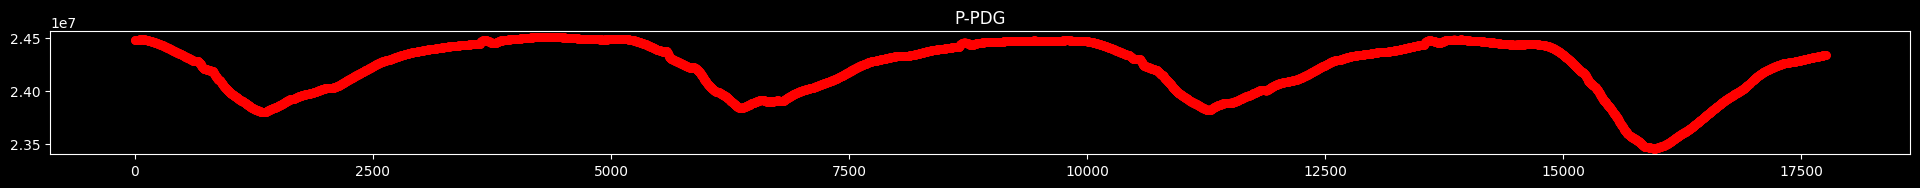

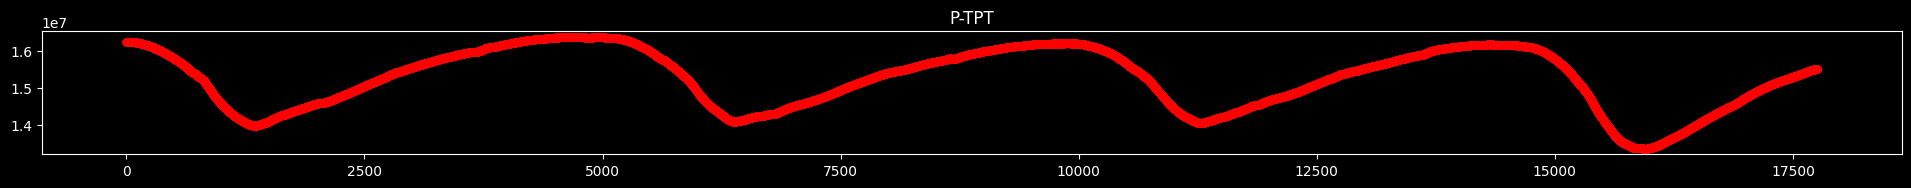

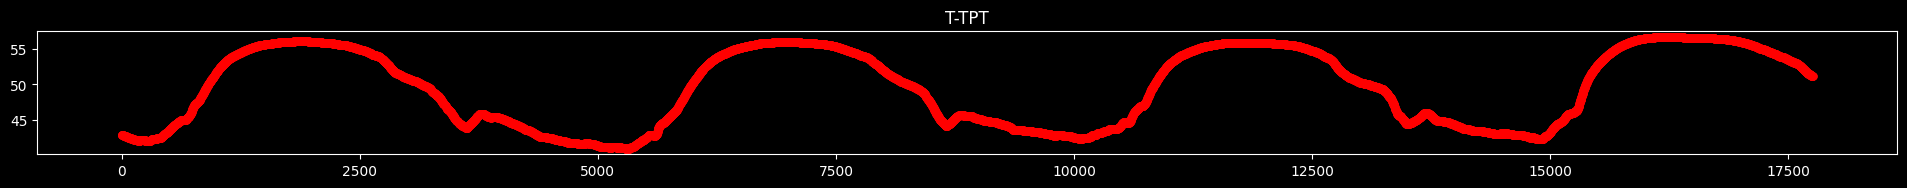

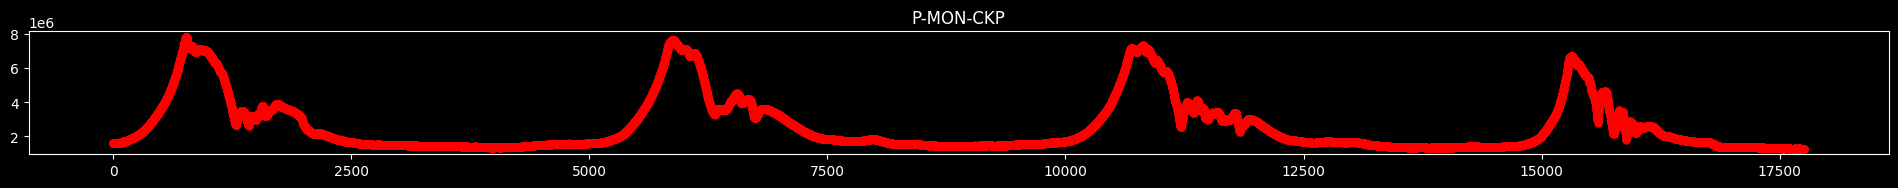

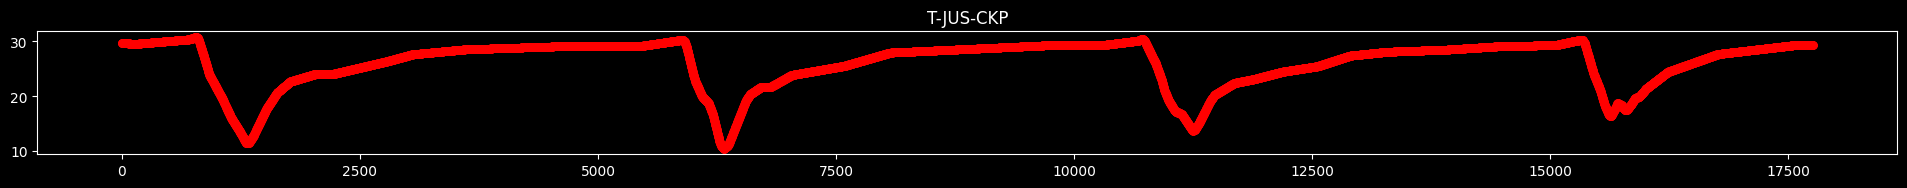

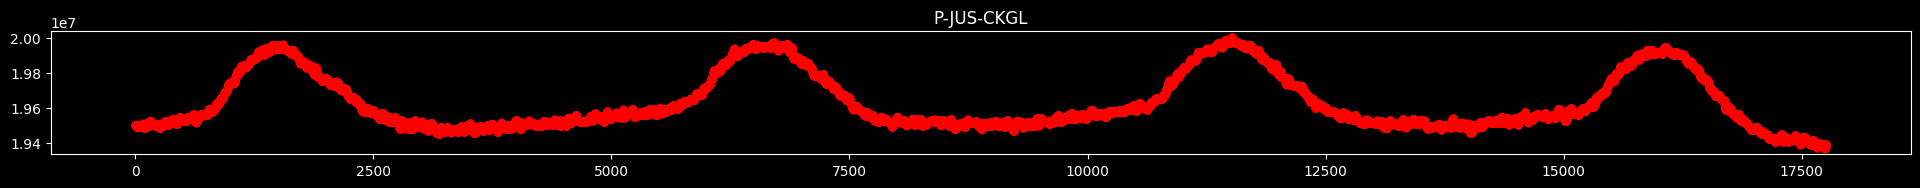

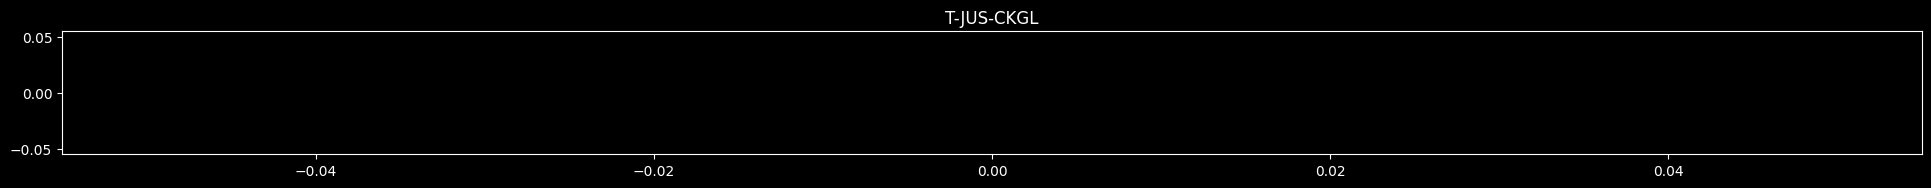

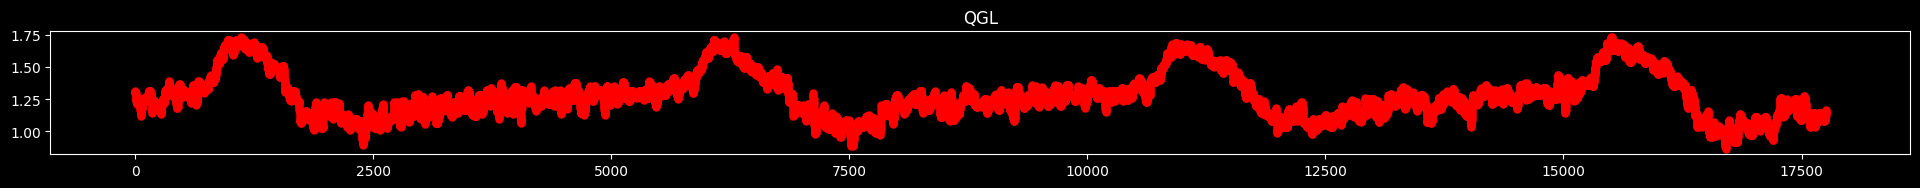

In [ ]:
# OCSVM이 -1로 잘못 예측한 데이터셋 (딱 이거 한 개임)

df1 = pd.read_csv("https://raw.githubusercontent.com/petrobras/3W/main/dataset/3/WELL-00014_20170921050404.csv")

d1_anomaly = df1[df1['class']==3]

for v, i in  enumerate(df1.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(d1_anomaly.index, d1_anomaly[i], 'o', color='red', markersize=5);
  plt.title(i)